This question is meant to help you comprehend how a naive bayes classifier works. Download the Titanic
Dataset and implementation includes the following tasks:-

1. Perform pre-processing and visualization of the dataset. Split the data into train and test sets. Also
identify the useful columns and drop the unnecessary ones

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("titanic.csv")
#df.head(30)

df1=df.drop(['Cabin'],axis=1)
df2=df1.drop(['Name'], axis=1)

df2.head(30)

#as we can see that column age is has few null values therfore we can do one thing that is replace the null values with the mean value of the column

mean_val = df2["Age"].mean()
df3=df2['Age'].fillna(mean_val,inplace=True)
df2.head(30)


# now we can do one thing over here is labelling the Sex of male and female with binary values

from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df2['Sex_en']= label.fit_transform(df2['Sex'])
df2=df2.drop(['Sex'],axis=1)

df2=df2.drop(['Fare'],axis=1)

df2.head(30)


,PassengerId,Pclass,Age,Ticket,Embarked,Survived,Sex_en
0,1,3,22.000000,A/5 21171,S,0,1
1,2,1,38.000000,PC 17599,C,1,0
2,3,3,26.000000,STON/O2. 3101282,S,1,0
3,4,1,35.000000,113803,S,1,0
4,5,3,35.000000,373450,S,0,1
5,6,3,29.699118,330877,Q,0,1
6,7,1,54.000000,17463,S,0,1
7,8,3,2.000000,349909,S,0,1
8,9,3,27.000000,347742,S,1,0
9,10,2,14.000000,237736,C,1,0


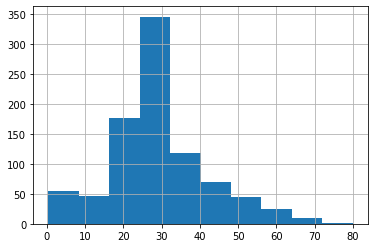

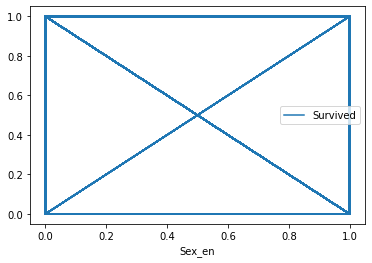

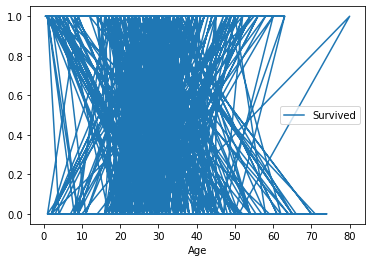

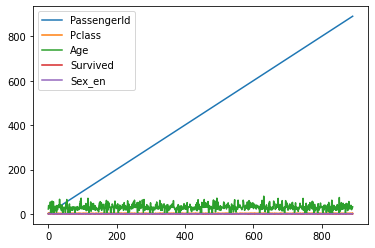

In [ ]:
# now we can do visualisations by plotting different columns

import matplotlib.pyplot as plt
df2['Age'].hist()


df2.plot(x='Sex_en', y='Survived')
df2.plot(x='Age',y='Survived')

#visualizing the X1 dataframe which does not contain the embarked dataframe while only conatins the numbers
X1=df2.drop(['Embarked'],axis=1)
X1.plot()

plt.show()

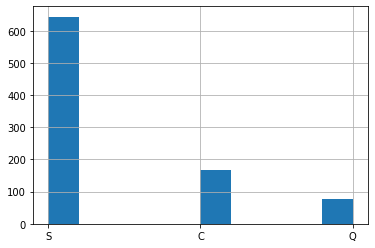

In [ ]:
import matplotlib.pyplot as plt
df2['Embarked'].hist()

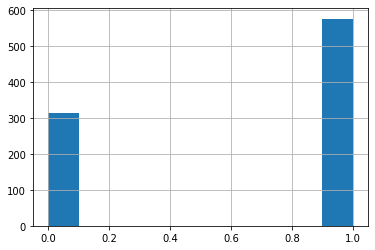

In [ ]:
import matplotlib.pyplot as plt
df2['Sex_en'].hist()

In [ ]:

import pandas as pd
import numpy as np

df=pd.read_csv("titanic.csv")


df2=df.dropna()

#now we get to know that there are no values

df2.isnull().sum()

# now in order to split to test train and validation sets first we need to convert into x and y numpy arrays

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts


Y=df2.Survived.to_numpy().astype('int')

X_data = df2.drop(columns=["Survived"],axis=1)
X = X_data.to_numpy()   

# splitting the data into test, train and validation

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)


print("length of dataframe : ", len(df2))
print("length of training set : ", len(x_train))
print("length of test set: ", len(x_test))






length of dataframe :  183
length of training set :  146
length of test set:  37


We have performed the pre-processing on the above dataset and removed the necessary columns which were not unique including name, fare and also have labeled Sex of the person using label encoder.

2. Identify the best possible variant of naive bayes classifier for the given dataset. Justify your reason for
the same 

The one of the best possible variant form the three variants we have is the Gaussian Naive Bayes classifier method which focuses on continous input dataset features which are normally distributed.

3. Implement the identified variant of Naive Bayes Classifier using scikit learn,report its performance based
on appropriate metrics.(ROC AUC etc) -

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = df2.drop(columns = ['Survived'],axis=1)
y = df2['Survived'] 

x1=x.drop(columns=['Embarked'], axis=1)
x2=x1.drop(columns=['Ticket'],axis=1)

from sklearn.model_selection import train_test_split

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, train_size = 0.8)

from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(x2_train, y_train)

y_pred = gauss.predict(x2_test)


from sklearn import metrics

print("Gaussian Naive Bayes model accuracy is :", metrics.accuracy_score(y_test, y_pred)*100 + '%')

# now implementing the confusion matrix

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

#Therfore as now we have implemented the confusion matrix then now we need to see the incorrect and correct predictions

incorr_prediction = conf_mat[0][1] + conf_mat[1][0]
corr_prediction = conf_mat[0][0] + conf_mat[1][1]

print("Incorrect Predictions : ", incorr_prediction)
print("Correct Predicitions : ", corr_prediction)


print ("True Negatives : ", conf_mat[0][0])
print ("False Positives : ", conf_mat[0][1])
print ("False Negatives : ", conf_mat[1][0])
print ("True Positives : ", conf_mat[1][1])


from sklearn.metrics import roc_curve


FP, TP, threshold = roc_curve(y_test,y_pred, pos_label=1)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(auc)



plt.style.use('seaborn')


plt.plot(FP, TP, linestyle='.',color='yellow')

plt.title('ROC curve plotted')

plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show();






4.Perform 5 fold cross validation and summarize the results across the cross-validation sets. Compute the
probability of the top class for each row in the testing dataset.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("titanic.csv")


df1=df.drop(['Cabin'],axis=1)
df2=df1.drop(['Name'], axis=1)




#as we can see that column age is has few null values therfore we can do one thing that is replace the null values with the mean value of the column

mean_val = df2["Age"].mean()

df3=df2['Age'].fillna(mean_val,inplace=True)
df2.head(20)


# now we can do one thing over here is labelling the Sex of male and female with binary values

from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df2['Sex_en']= label.fit_transform(df2['Sex'])
df2=df2.drop(['Sex'],axis=1)

df2=df2.drop(['Fare'],axis=1)
df2=df2.drop(['Ticket'],axis=1)
df2=df2.drop(['Embarked'],axis=1)

df2.head(30)

#now training the dataset

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts


Y=df2.Survived.to_numpy().astype('int')

X_data = df2.drop(columns=["Survived"],axis=1)
X = X_data.to_numpy()   

# splitting the data into test, train and validation

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)

from sklearn.linear_model import LinearRegression

model=LinearRegression()

mymodel=model.fit(x_train,y_train)

#now implemeting the k cross validation score

from sklearn.model_selection import cross_val_score

scores=cross_val_score(mymodel,x_train,y_train,scoring='r2',cv=5)


#now printing the average value of the scores of the training data

print("The average value of scores of training data", np.mean(scores))

#now importing cross validation predict function

from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(model,x_test,y_test)

#now performing 5 fold cv on test data

from sklearn.model_selection import cross_val_score

scorestest=cross_val_score(mymodel,x_test,y_test,cv=5)


print("The average value of scores of training data", np.mean(scorestest))




The average value of scores of training data 0.38274018281315536
The average value of scores of training data 0.29387107181466243


Q2. There are 210 rows with 7 input variables and 1 output variable. The variable names are as given:
1. Area.
2. Perimeter.
3. Compactness
4. Length of kernel.
5. Width of kernel.
6. Asymmetry coefficient.
7. Length of kernel groove.
8. Class (1, 2, 3).

a. Use histogram to plot the distribution of samples.

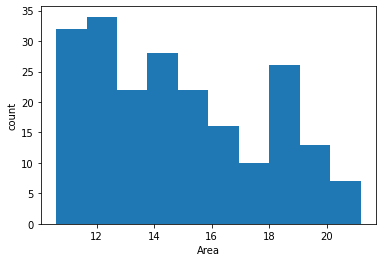

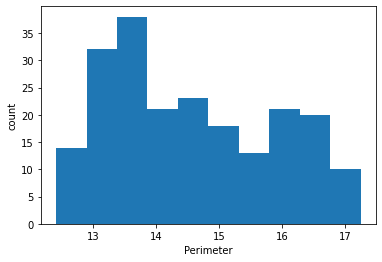

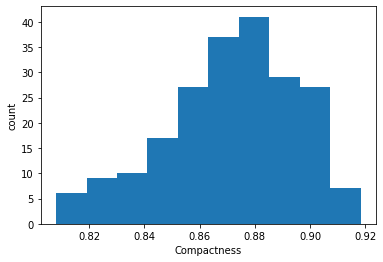

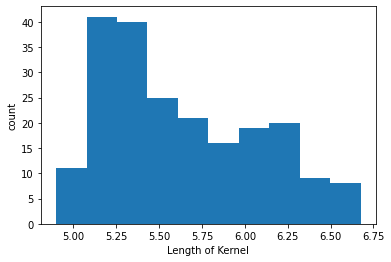

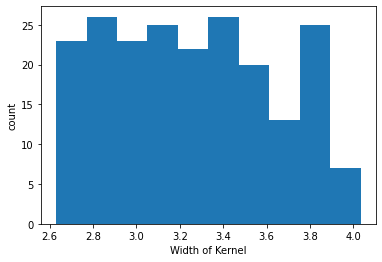

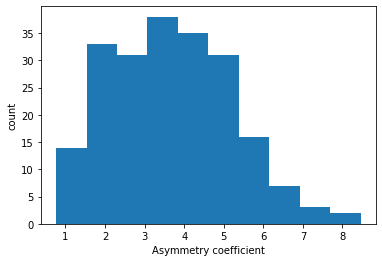

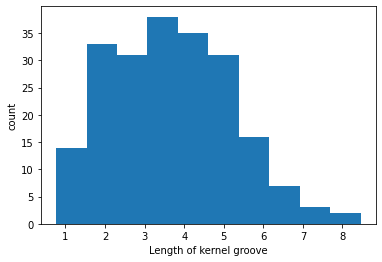

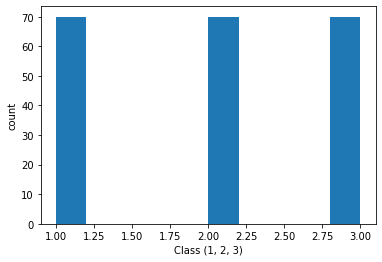

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("dataset.csv").to_numpy()


x0=df[:,0]

plt.hist(x0)
plt.xlabel("Area")
plt.ylabel("count")
plt.show()

x1=df[:,1]

plt.hist(x1)
plt.xlabel("Perimeter")
plt.ylabel("count")
plt.show()


x2=df[:,2]

plt.hist(x2)
plt.xlabel("Compactness")
plt.ylabel("count")
plt.show()

x3=df[:,3]

plt.hist(x3)
plt.xlabel("Length of Kernel")
plt.ylabel("count")
plt.show()

x4=df[:,4]

plt.hist(x4)
plt.xlabel("Width of Kernel")
plt.ylabel("count")
plt.show()


x5=df[:,5]

plt.hist(x5)
plt.xlabel("Asymmetry coefficient")
plt.ylabel("count")
plt.show()

x6=df[:,6]

plt.hist(x5)
plt.xlabel("Length of kernel groove")
plt.ylabel("count")
plt.show()


y=df[:,7]

plt.hist(y)
plt.xlabel("Class (1, 2, 3)")
plt.ylabel("count")
plt.show()


b. Determine the prior probability for all the classes.

In [ ]:
#now first we need to create the labels from the data

label = []
x_c1 = []
x_c2 = []
c1_count = 0
c2_count = 0
for i in range(df.shape[0]):
  if(df[i][1] > 550):
    label.append(1)
    x_c1.append(df[i][0])
    
    c1_count += 1
  else:
    label.append(0)
    x_c2.append(df[i][0])
    
    c2_count += 1
    

  

#Prior Probabilities for both the classes

no_of_samples = len(df)
prob_c1 = c1_count/no_of_samples
prob_c2 = c2_count/no_of_samples
print("Prior Class 1:",prob_c1)
print("Prior Class 2:",prob_c2)




Prior Class 1: 0.0
Prior Class 2: 1.0


d. Determine the likelihood/class conditional probabilities for all the classes.

e. Plot the count of each unique element for each class. Compare the plot with the plot of distribution.

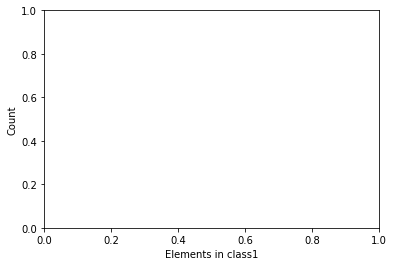

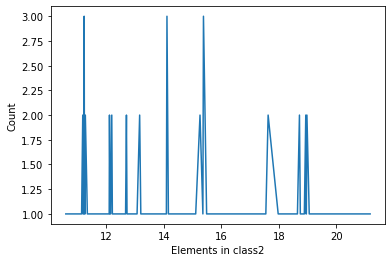

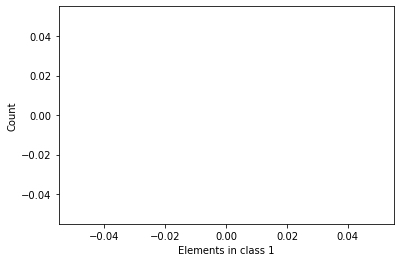

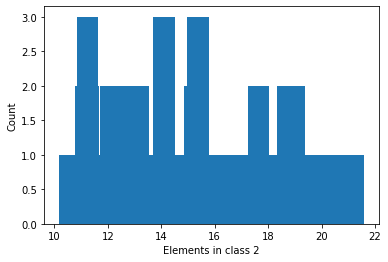

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


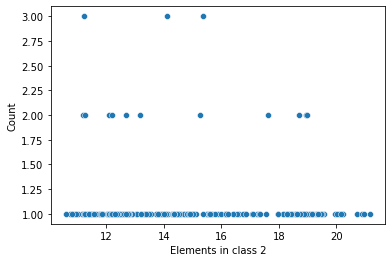

In [ ]:
import seaborn as sns
from collections import Counter
#unique values

unique_c1 = Counter(x_c1).keys() 
count_unique_c1 = list(Counter(x_c1).values()) 
unique_c2 = Counter(x_c2).keys() 
count_unique_c2 = list(Counter(x_c2).values()) 

sns.lineplot(list(unique_c1),count_unique_c1)
plt.xlabel("Elements in class1")
plt.ylabel("Count")
plt.show()



sns.lineplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class2")
plt.ylabel("Count")
plt.show()

#comparing it  to the plot of distribution

plt.bar(unique_c1,count_unique_c1)
plt.xlabel("Elements in class 1")
plt.ylabel("Count")
plt.show()

plt.bar(unique_c2,count_unique_c2)
plt.xlabel("Elements in class 2")
plt.ylabel("Count")
plt.show()

#Ploting for the unique values in class c2

sns.scatterplot(list(unique_c2),count_unique_c2)
plt.xlabel("Elements in class 2")
plt.ylabel("Count")
plt.show()


#Liklihood of the function


f.Calculate the posterior probabilities and plot them in a single graph. Analyze the plot.

Evidence Array:  [0.00952381 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.01428571 0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.00952381 0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.01428571 0.00952381 0.0047619  0.01428571 0.0047619  0.0047619
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.00952381 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619
 0.0047619  0.0047619  0.00952381 0.0047619  0.0047619  0.00952381
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0.00952381
 0.0047619  0.0047619  0.0047619  0.0047619  0.0047619  0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


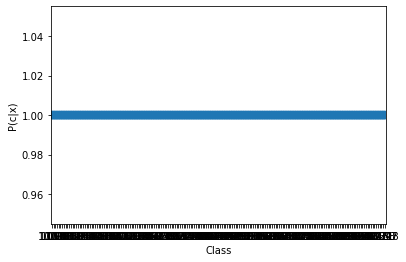

In [ ]:
import seaborn as sns

y1 = np.array(count_unique_c1)/len(x_c1)
#sns.pointplot(list(unique_c1),y1, linestyles="--",markers =['x'] )
y2 = np.array(count_unique_c2)/len(x_c2)


p_1 = y1 * prob_c1
p_2 = y2 * prob_c2
e_key = list(Counter(x_c1+x_c2).keys())
e_value = list(Counter(x_c1+x_c2).values())
evidence_array = np.array(e_value)/(len(x_c1)+len(x_c2))
print("Evidence Array: ", evidence_array)

posterior_c1 = p_1
unique_c1_list= list(unique_c1)

for i in range(len(unique_c1)):
  x = unique_c1_list[i]
  position = e_key.index(x)
  evidence = evidence_array[position]
  posterior_c1[i] = posterior_c1[i]/evidence

posterior_c2 = p_2
unique_c2_list= list(unique_c2)

for i in range(len(unique_c2)):
  x = unique_c2_list[i]
  position = e_key.index(x)
  evidence = evidence_array[position]
  posterior_c2[i] = posterior_c2[i]/evidence

print("Posterior C1: ", posterior_c1)
print("Posterior C2: ", posterior_c2)


#Plot P(C1|x) and P(C2|x)

#sns.pointplot(list(unique_c1),posterior_c1, linestyles="--",markers =['x'] )
sns.pointplot(list(unique_c2),posterior_c2, linestyles="-",markers =['o'] )
plt.xlabel("Class")
plt.ylabel("P(c|x)")
plt.show()
